<a href="https://colab.research.google.com/github/ezhatiara/customer-churn-prediction/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Churn

**Background**

Within the fiercely competitive telecommunications industry, companies are consistently striving to maintain their customer base. One of the primary challenges they face is Customer Churn, which poses a continual threat to revenue streams and brand reputation.

**Goal**

The objective of Customer Churn Prediction is pivotal, seeking to mitigate revenue losses, fortify customer retention initiatives, optimize operational efficiencies, elevate overall customer experience, and establish a sustainable competitive advantage in the market.

**Objective**

- To discern underlying patterns of customer churn.
- To develop machine learning models capable of accurately predicting churn events.

# Load Data

In [1]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Data Train.csv to Data Train.csv


In [3]:
df_train = pd.read_csv(io.BytesIO(uploaded['Data Train.csv']))
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
features = df_train.columns
print('data features : \n', features)

data features : 
 Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')


# Exploratory Data Analysis


In [5]:
size = df_train.shape

num_rows = size[0]
num_columns = size[1]

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 4250
Number of columns: 20


**Data Overview**

In [6]:
df_summary = pd.DataFrame({
  'column': df_train.columns,
  'datatype': df_train.dtypes,
  'unique_values': df_train.nunique(),
  'unique_sample': df_train.columns.map(lambda col: df_train[col].unique()[:5]),
})

df_summary


,column,datatype,unique_values,unique_sample
state,state,object,51,"[OH, NJ, OK, MA, MO]"
account_length,account_length,int64,215,"[107, 137, 84, 75, 121]"
area_code,area_code,object,3,"[area_code_415, area_code_408, area_code_510]"
international_plan,international_plan,object,2,"[no, yes]"
voice_mail_plan,voice_mail_plan,object,2,"[yes, no]"
number_vmail_messages,number_vmail_messages,int64,46,"[26, 0, 24, 37, 27]"
total_day_minutes,total_day_minutes,float64,1843,"[161.6, 243.4, 299.4, 166.7, 218.2]"
total_day_calls,total_day_calls,int64,120,"[123, 114, 71, 113, 88]"
total_day_charge,total_day_charge,float64,1843,"[27.47, 41.38, 50.9, 28.34, 37.09]"
total_eve_minutes,total_eve_minutes,float64,1773,"[195.5, 121.2, 61.9, 148.3, 348.5]"


**Numerical data**

In [7]:
num_cols = [col for col in df_train.columns if pd.api.types.is_numeric_dtype(df_train[col])]
print("numerical columns:")
for col in num_cols:
    print(col)

numerical columns:
account_length
number_vmail_messages
total_day_minutes
total_day_calls
total_day_charge
total_eve_minutes
total_eve_calls
total_eve_charge
total_night_minutes
total_night_calls
total_night_charge
total_intl_minutes
total_intl_calls
total_intl_charge
number_customer_service_calls


Descriptions of the columns:

1. **account_length**: The duration of the customer's account in months.
2. **number_vmail_messages**: The number of voicemail messages received by the customer.
3. **total_day_minutes**: The total number of minutes used by the customer during the day.
4. **total_day_calls**: The total number of calls made by the customer during the day.
5. **total_day_charge**: The total charge incurred by the customer for usage during the day.
6. **total_eve_minutes**: The total number of minutes used by the customer during the evening.
7. **total_eve_calls**: The total number of calls made by the customer during the evening.
8. **total_eve_charge**: The total charge incurred by the customer for usage during the evening.
9. **total_night_minutes**: The total number of minutes used by the customer during the night.
10. **total_night_calls**: The total number of calls made by the customer during the night.
11. **total_night_charge**: The total charge incurred by the customer for usage during the night.
12. **total_intl_minutes**: The total number of minutes used by the customer for international calls.
13. **total_intl_calls**: The total number of international calls made by the customer.
14. **total_intl_charge**: The total charge incurred by the customer for international calls.
15. **number_customer_service_calls**: The number of calls made by the customer to customer service.

In [8]:
# Descriptive Statistical Summary for Numeric Columns
print("Descriptive Statistical Summary:")
descriptions_numerical = df_train[num_cols].describe().T
descriptions_numerical['skewness'] = df_train[num_cols].skew()

# Calculating Range
range_values = df_train[num_cols].max() - df_train[num_cols].min()
descriptions_numerical['range'] = range_values

descriptions_numerical

Descriptive Statistical Summary:


,count,mean,std,min,25%,50%,75%,max,skewness,range
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00,0.122327,242.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00,1.373091,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50,-0.006910,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00,-0.085812,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76,-0.006913,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30,-0.030415,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00,-0.020812,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54,-0.030388,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00,0.008491,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00,0.005273,175.00


**Categorical columns**

In [9]:
cat_cols = df_train.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:")
for col in cat_cols:
  print(col)

Categorical columns:
state
area_code
international_plan
voice_mail_plan
churn


**Column Descriptions:**

1. **State**: Indicates the state of residence of the customer, with 51 different states represented in the dataset.

2. **Area Code**: Represents the area code assigned to the customer, categorized as area_code_415, area_code_408, and area_code_510.

3. **International Plan**: Indicates whether the customer has subscribed to an international plan — 'yes' or 'no'.

4. **Voice Mail Plan**: Indicates the subscription status of the customer to a voicemail plan — 'yes' or 'no'.

5. **Churn**: Describes whether the customer has left the service ('yes') or remains a subscriber ('no').

In [10]:
# Generate descriptive statistical summary for categorical columns in df_train
description_categorical = df_train.describe(include='object').T
description_categorical['value_counts'] = [df_train[col].value_counts().to_dict() for col in description_categorical.index]  # Proportion of each value
description_categorical

,count,unique,top,freq,value_counts
state,4250,51,WV,139,"{'WV': 139, 'MN': 108, 'ID': 106, 'AL': 101, '..."
area_code,4250,3,area_code_415,2108,"{'area_code_415': 2108, 'area_code_408': 1086,..."
international_plan,4250,2,no,3854,"{'no': 3854, 'yes': 396}"
voice_mail_plan,4250,2,no,3138,"{'no': 3138, 'yes': 1112}"
churn,4250,2,no,3652,"{'no': 3652, 'yes': 598}"


**Summary:**

* The dataset consists of 4250 rows and 20 columns.
* There are 15 numerical columns (data type: int and float) and 5 categorical columns (data type: object) in the dataset.

In [11]:
import plotly.express as px

def plot_pie_chart(data, column):
    counts = data[column].value_counts()
    fig = px.pie(names=counts.index, values=counts.values, title=f'pie chart of {column}', color_discrete_sequence=['purple', 'mediumpurple'])
    fig.update_layout(width=800, height=800)
    fig.show()
plot_pie_chart(df_train, 'churn')

* The classes 'yes' and 'no' are imbalanced.
* There are 598 instances labeled as 'yes' and 3652 instances labeled as 'no'.
* The percentage of customers who switched to another operator is 14%.

In [12]:
import plotly.express as px
cat_cols = [col for col in cat_cols if col != 'churn']
for feature in cat_cols:
    counts = df_train.groupby([feature, 'churn']).size().reset_index(name='count')
    total_data = counts['count'].sum()
    counts['percentage'] = (counts['count'] / total_data) * 100

    fig = px.bar(
        counts, x=feature,
        y='count', color='churn',
        title=f'comparison of {feature} by churn',
        text='percentage',
        color_discrete_sequence=['purple', 'mediumpurple'])
    fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
    fig.show()

* Customers with an international plan tend to churn at a rate of 42%.
* Customers without a voice mail plan tend to churn at a rate of 16%.
* The churn percentage tends to be consistent across all area codes (13-15%).
* The churn percentage tends to be consistent across all states (0.1-0.4%).

In [13]:
def crosstab_function(df, var):
    tab = pd.DataFrame(pd.crosstab(df[var], df["churn"], margins=True)).reset_index()
    tab['churn_percentage'] = tab['yes'] / tab['All'] * 100
    tab.columns = [var, 'total','churn_no', 'churn_yes', 'churn_percentage']
    return tab
crosstab_function(df_train, 'international_plan')

,international_plan,total,churn_no,churn_yes,churn_percentage
0,no,3423,431,3854,11.183186
1,yes,229,167,396,42.171717
2,All,3652,598,4250,14.070588


In [14]:
crosstab_function(df_train, 'voice_mail_plan')

,voice_mail_plan,total,churn_no,churn_yes,churn_percentage
0,no,2622,516,3138,16.443595
1,yes,1030,82,1112,7.374101
2,All,3652,598,4250,14.070588


In [15]:
crosstab_function(df_train, 'area_code')

,area_code,total,churn_no,churn_yes,churn_percentage
0,area_code_408,934,152,1086,13.996317
1,area_code_415,1821,287,2108,13.614801
2,area_code_510,897,159,1056,15.056818
3,All,3652,598,4250,14.070588


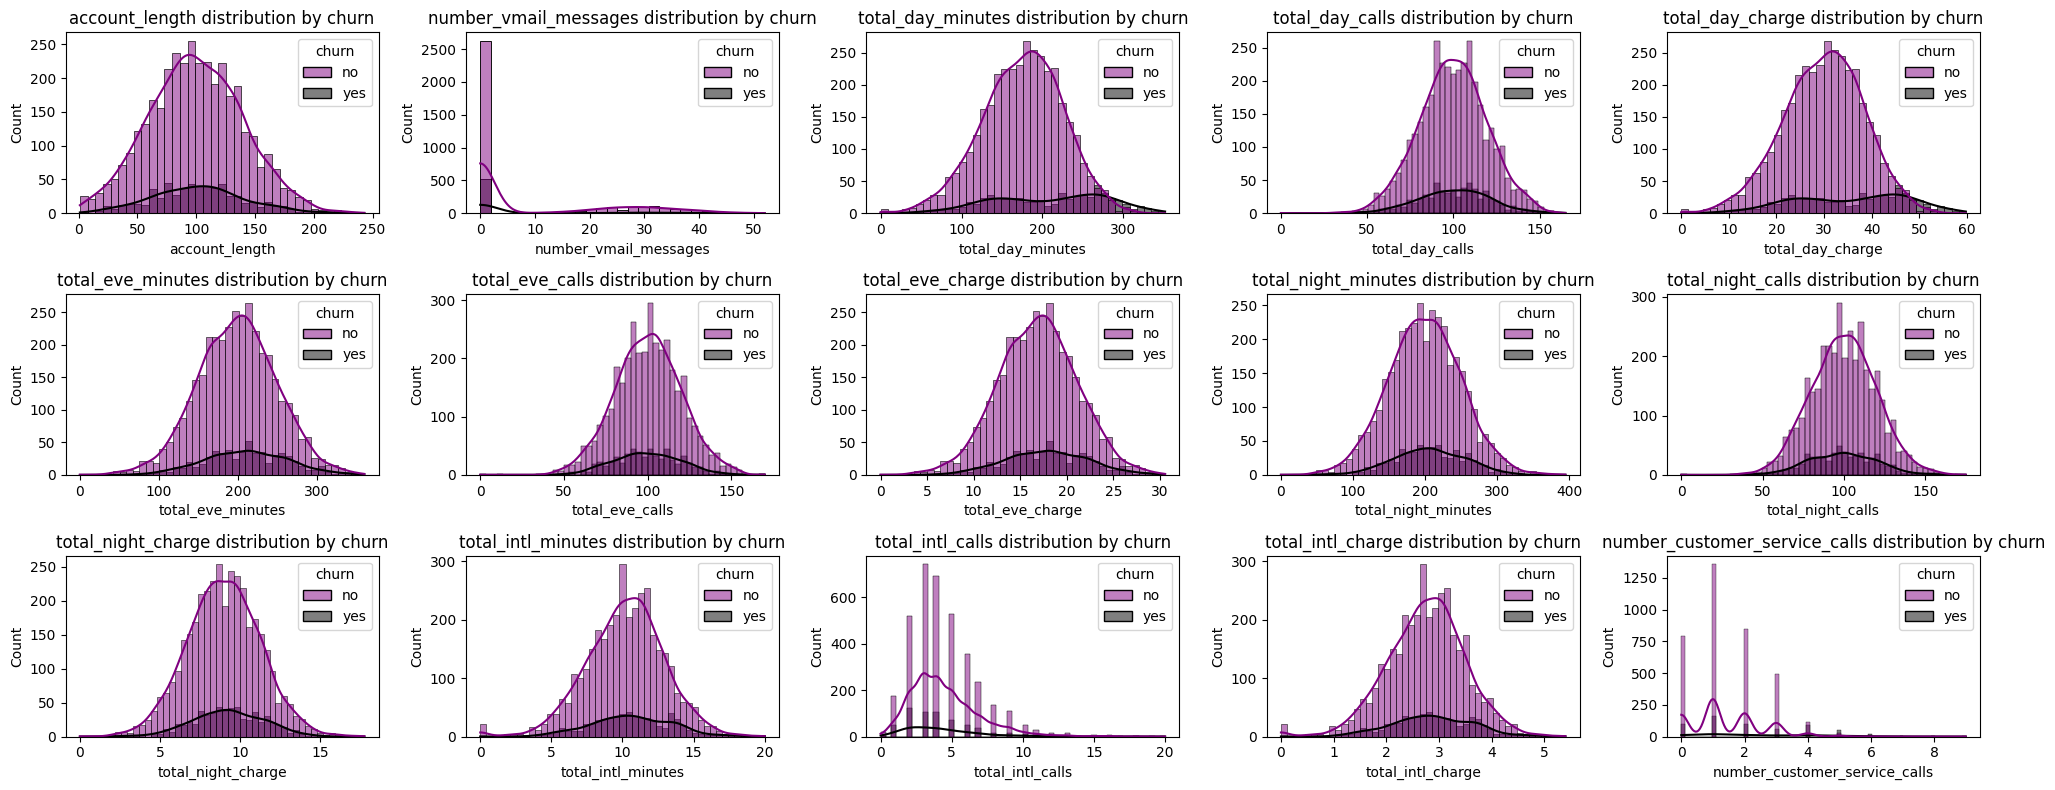

In [16]:
plt.figure(figsize=(20, 8))
for i, col in enumerate(num_cols):
    plt.subplot(3, 5, i+1)
    sns.histplot(data=df_train, x=col, hue='churn', palette=['purple', 'black'],
                 kde=True, fill=True).set(title=f'{col} distribution by churn')
plt.tight_layout()
plt.show()

* The majority of the data distributions are approximately normal.
* The columns number_vmail_messages, total_intl_calls, and number_customer_service_calls exhibit positive skewness.

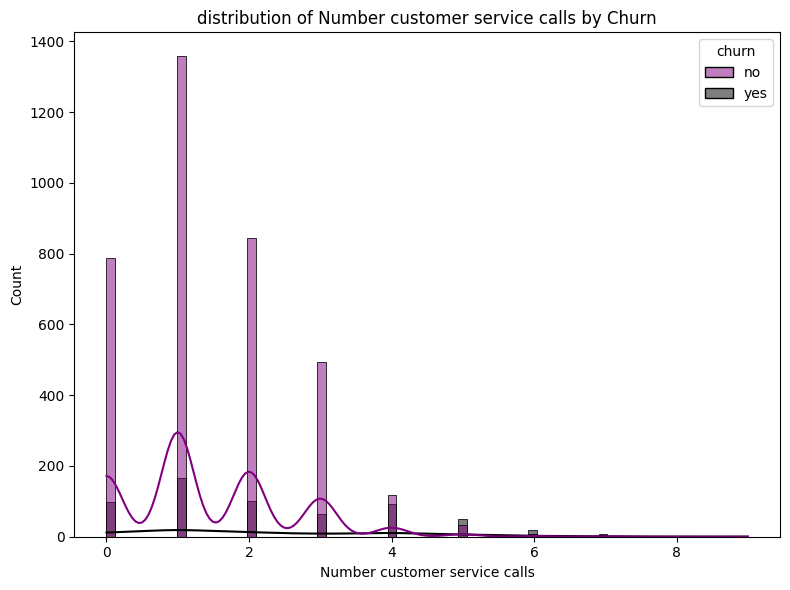

In [17]:
def plot_churn_distribution(df, x, hue, palette=['purple', 'black']):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=x, hue=hue, palette=palette, kde=True, fill=True)
    plt.title('distribution of ' + x.replace('_', ' ').capitalize() + ' by ' + hue.capitalize())
    plt.xlabel(x.replace('_', ' ').capitalize())
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

plot_churn_distribution(df_train, 'number_customer_service_calls', 'churn')

In [18]:
crosstab_function(df_train, 'number_customer_service_calls')

,number_customer_service_calls,total,churn_no,churn_yes,churn_percentage
0,0,789,97,886,10.948081
1,1,1358,166,1524,10.892388
2,2,845,102,947,10.770855
3,3,495,63,558,11.290323
4,4,117,92,209,44.019139
5,5,32,49,81,60.493827
6,6,9,19,28,67.857143
7,7,6,7,13,53.846154
8,8,1,1,2,50.000000
9,9,0,2,2,100.000000


* It is evident that there is an increase in the churn rate starting from the 4th customer service call onwards.
* This may indicate poor quality of customer service.

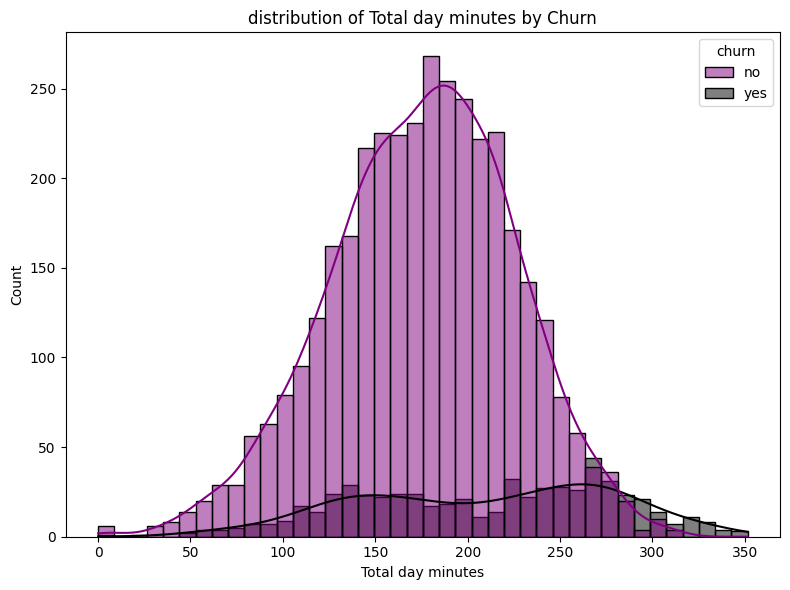

In [19]:
plot_churn_distribution(df_train, 'total_day_minutes', 'churn')

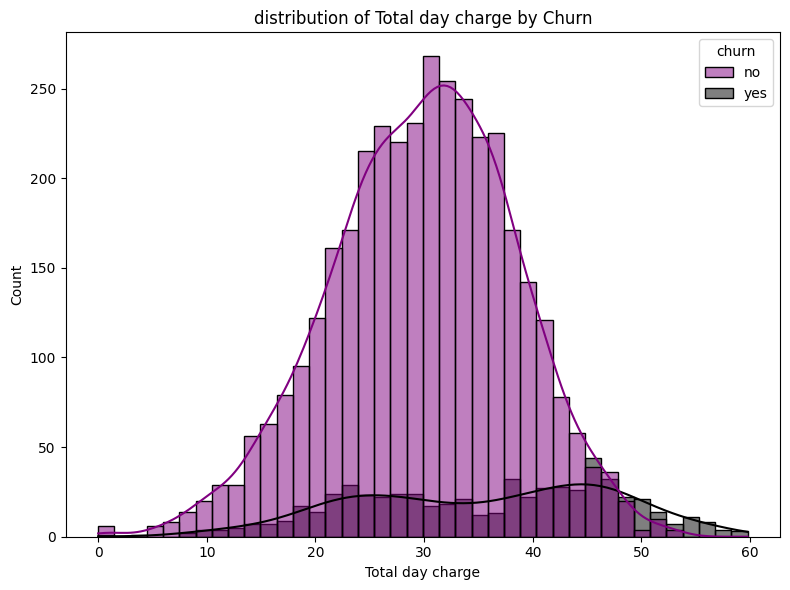

In [20]:
plot_churn_distribution(df_train, 'total_day_charge', 'churn')

The higher the duration and cost of calls during the daytime, the churn rate also increases, especially after exceeding 300 minutes.

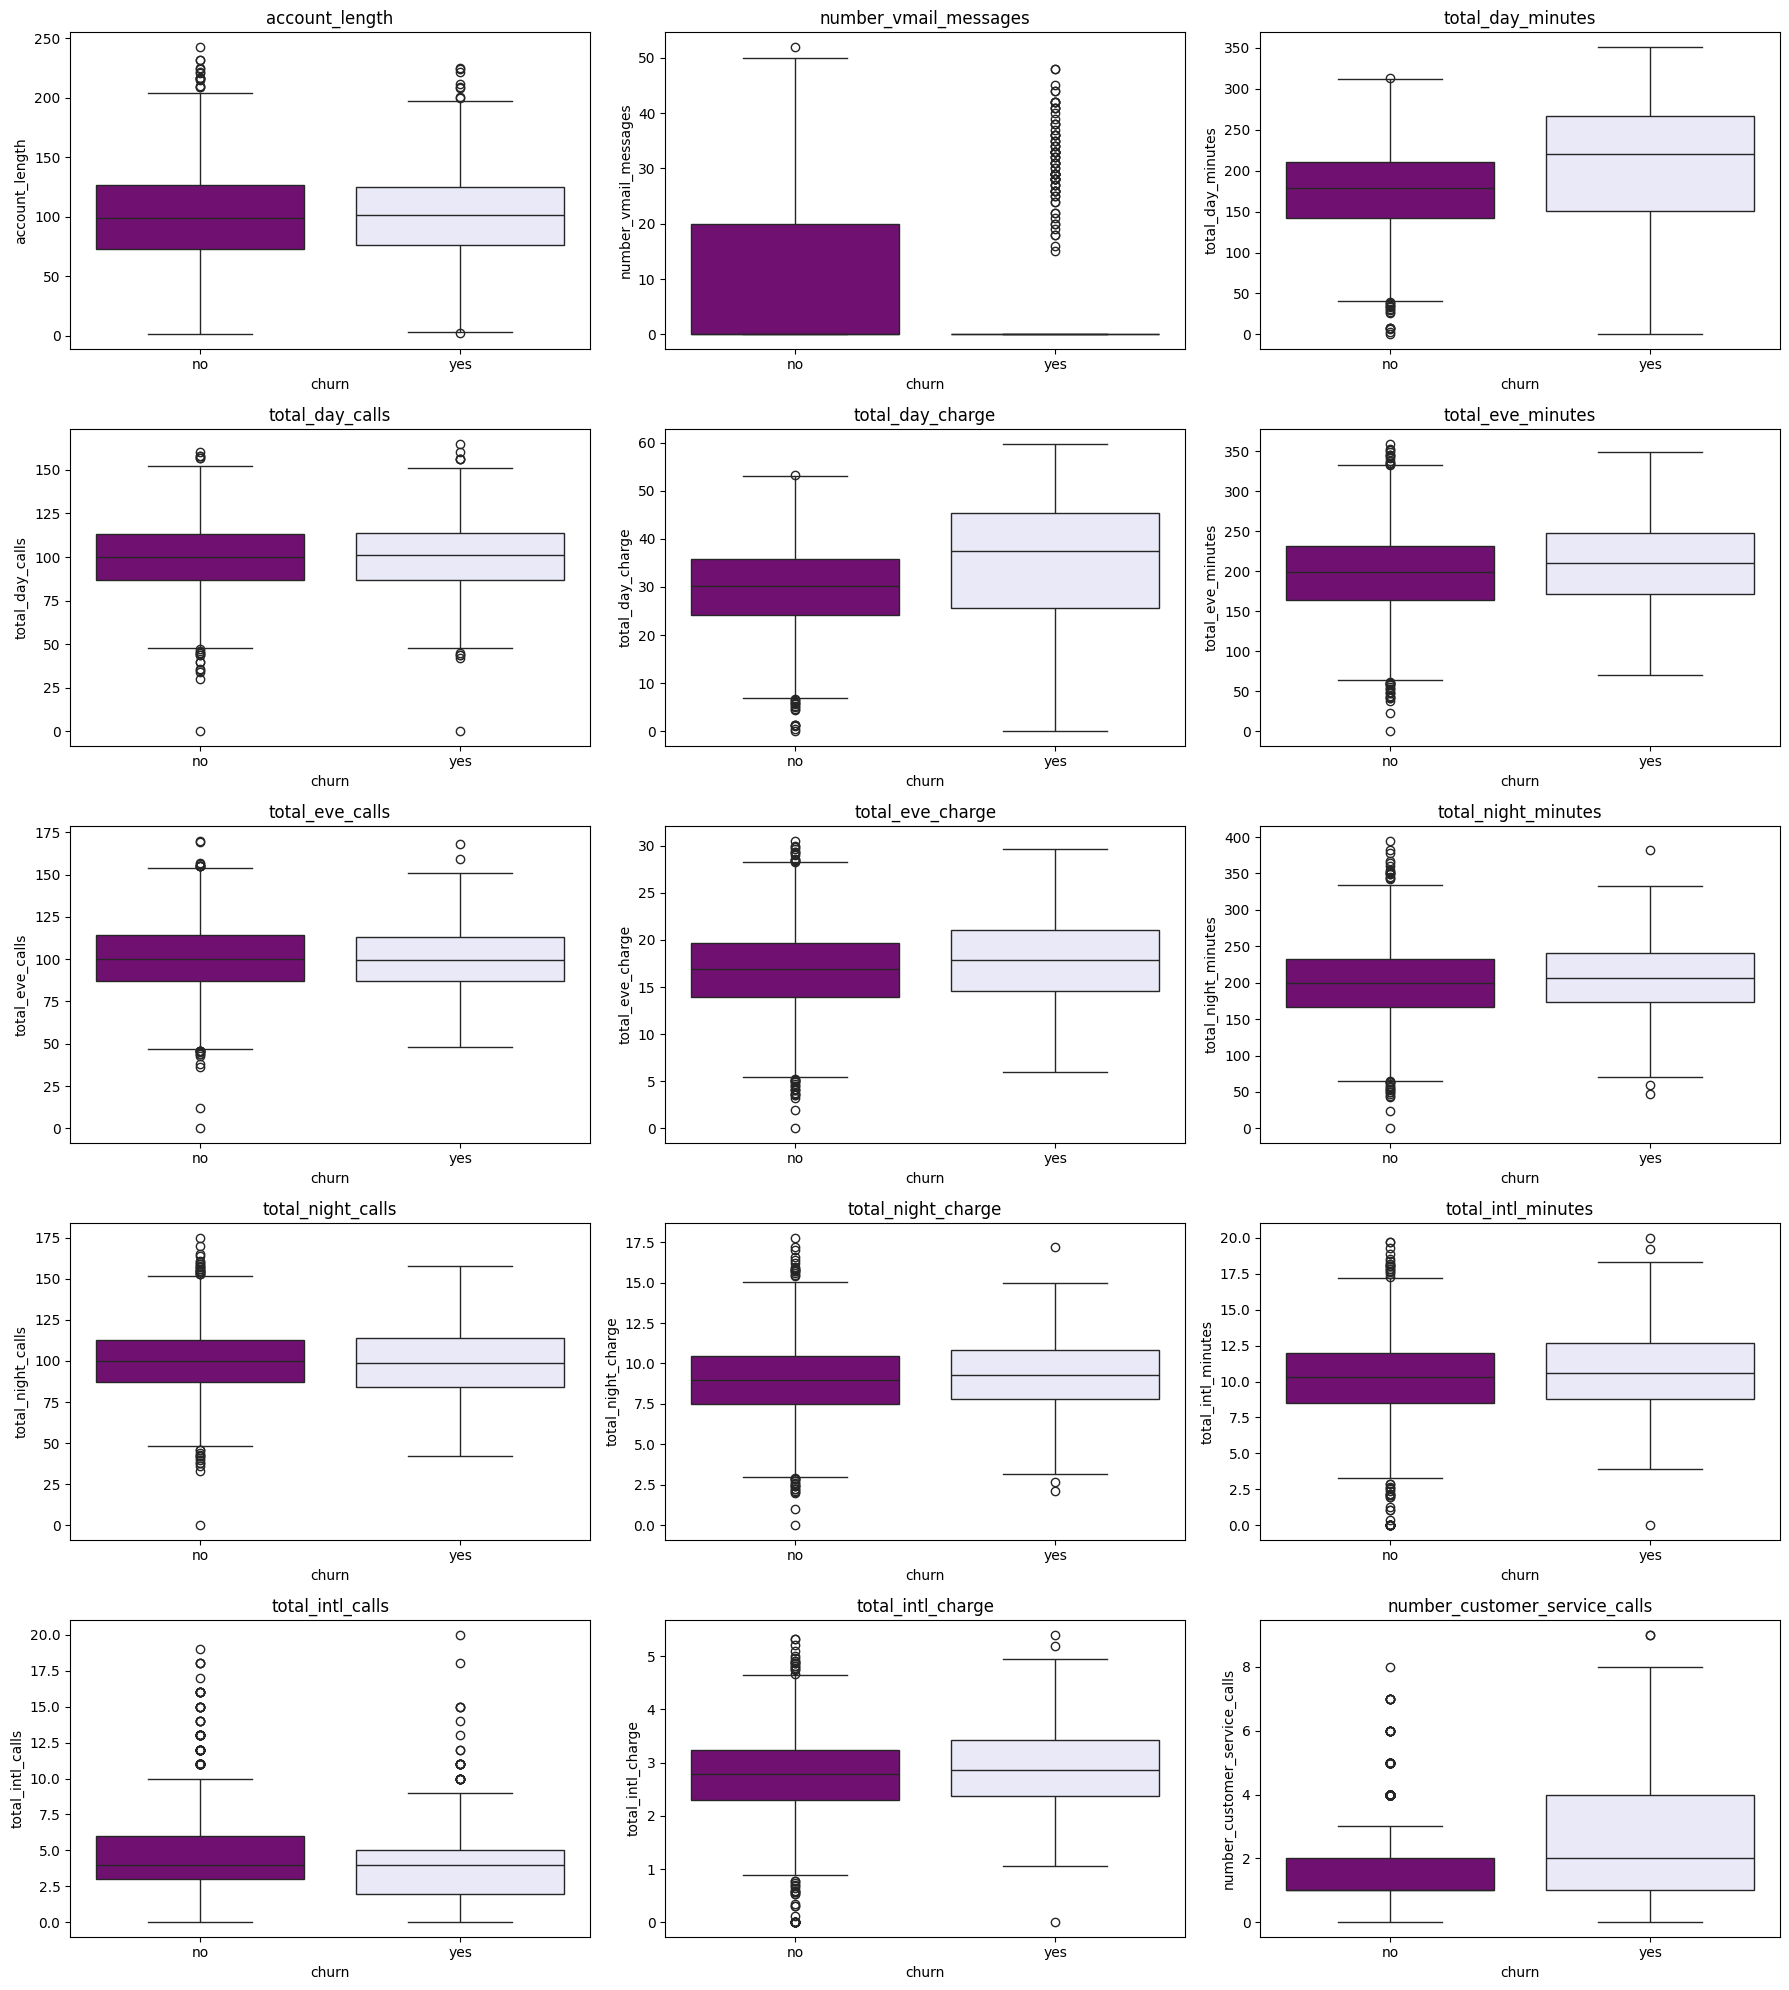

In [21]:
def plot_boxplots(df, num_cols, churn_col):
    num_subplots = len(num_cols)
    num_rows = (num_subplots + 2) // 3
    num_cols_subplot = min(num_subplots, 3)
    fig, axes = plt.subplots(num_rows, num_cols_subplot, figsize=(num_cols_subplot * 6, num_rows * 4))
    custom_palette = ["purple", "lavender"]
    for i, col_name in enumerate(num_cols):
        ax = axes[i // 3, i % 3] if num_rows > 1 else axes[i % 3]
        sns.boxplot(x=churn_col, y=col_name, data=df, hue=churn_col, palette=custom_palette, ax=ax, legend=False)
        ax.set_title(col_name)
    plt.tight_layout()
    plt.show()
plot_boxplots(df_train, num_cols, 'churn')

In [22]:
total_duplicates = df_train.duplicated().sum()
total_missing_values = df_train.isnull().sum().sum()
print("Missing values per numeric column:")
print('\n', df_train.select_dtypes(include='number').isnull().sum())
print('\nTotal Duplicates:', total_duplicates)
print('Total Missing Values:', total_missing_values)

Missing values per numeric column:

 account_length                   0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

Total Duplicates: 0
Total Missing Values: 0


In [23]:
def detect_outliers(df_train, num_cols):
    outliers_dict = {}
    total_outliers = 0
    for col in num_cols:
        Q1 = df_train[col].quantile(0.25)
        Q3 = df_train[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_count = ((df_train[col] < lower_bound) | (df_train[col] > upper_bound)).sum()
        outliers_dict[col] = outliers_count
        total_outliers += outliers_count

    return outliers_dict, total_outliers

In [24]:
outliers_dict, total_outliers = detect_outliers(df_train, num_cols)
print("Outliers detected per column:")
for col, count in outliers_dict.items():
    print(f"{col}: {count}")
print("Total Outliers:", total_outliers)

Outliers detected per column:
account_length: 20
number_vmail_messages: 86
total_day_minutes: 25
total_day_calls: 28
total_day_charge: 26
total_eve_minutes: 34
total_eve_calls: 24
total_eve_charge: 34
total_night_minutes: 37
total_night_calls: 33
total_night_charge: 37
total_intl_minutes: 62
total_intl_calls: 100
total_intl_charge: 62
number_customer_service_calls: 335
Total Outliers: 943


* All features seem to exhibit outliers, totaling 943 instances.
* There are no missing or duplicate data entries.
* In addressing outliers, feature values will be replaced with the median value.

In [25]:
df_out = df_train.copy()
def replace_outliers(df, labels):
    for label in labels:
        q1 = df_out[label].quantile(0.25)
        q3 = df_out[label].quantile(0.75)
        iqr = q3 - q1
        max_val = q3 + 1.5 * iqr
        min_val = q1 - 1.5 * iqr
        df_out[label] = np.where(df_out[label] > max_val, max_val, np.where(df_out[label] < min_val, min_val, df_out[label]))
        df_out[label] = df_out[label].mask(df_out[label] > max_val, df_out[label].mean())
    return df_out

In [26]:
df_cleaned = replace_outliers(df_out, num_cols)

In [27]:
outliers_dict, total_outliers = detect_outliers(df_cleaned, num_cols)
print("Outliers detected per column:")
for col, count in outliers_dict.items():
    print(f"{col}: {count}")
print("Total Outliers:", total_outliers)

Outliers detected per column:
account_length: 0
number_vmail_messages: 0
total_day_minutes: 0
total_day_calls: 0
total_day_charge: 0
total_eve_minutes: 0
total_eve_calls: 0
total_eve_charge: 0
total_night_minutes: 0
total_night_calls: 0
total_night_charge: 0
total_intl_minutes: 0
total_intl_calls: 0
total_intl_charge: 0
number_customer_service_calls: 0
Total Outliers: 0


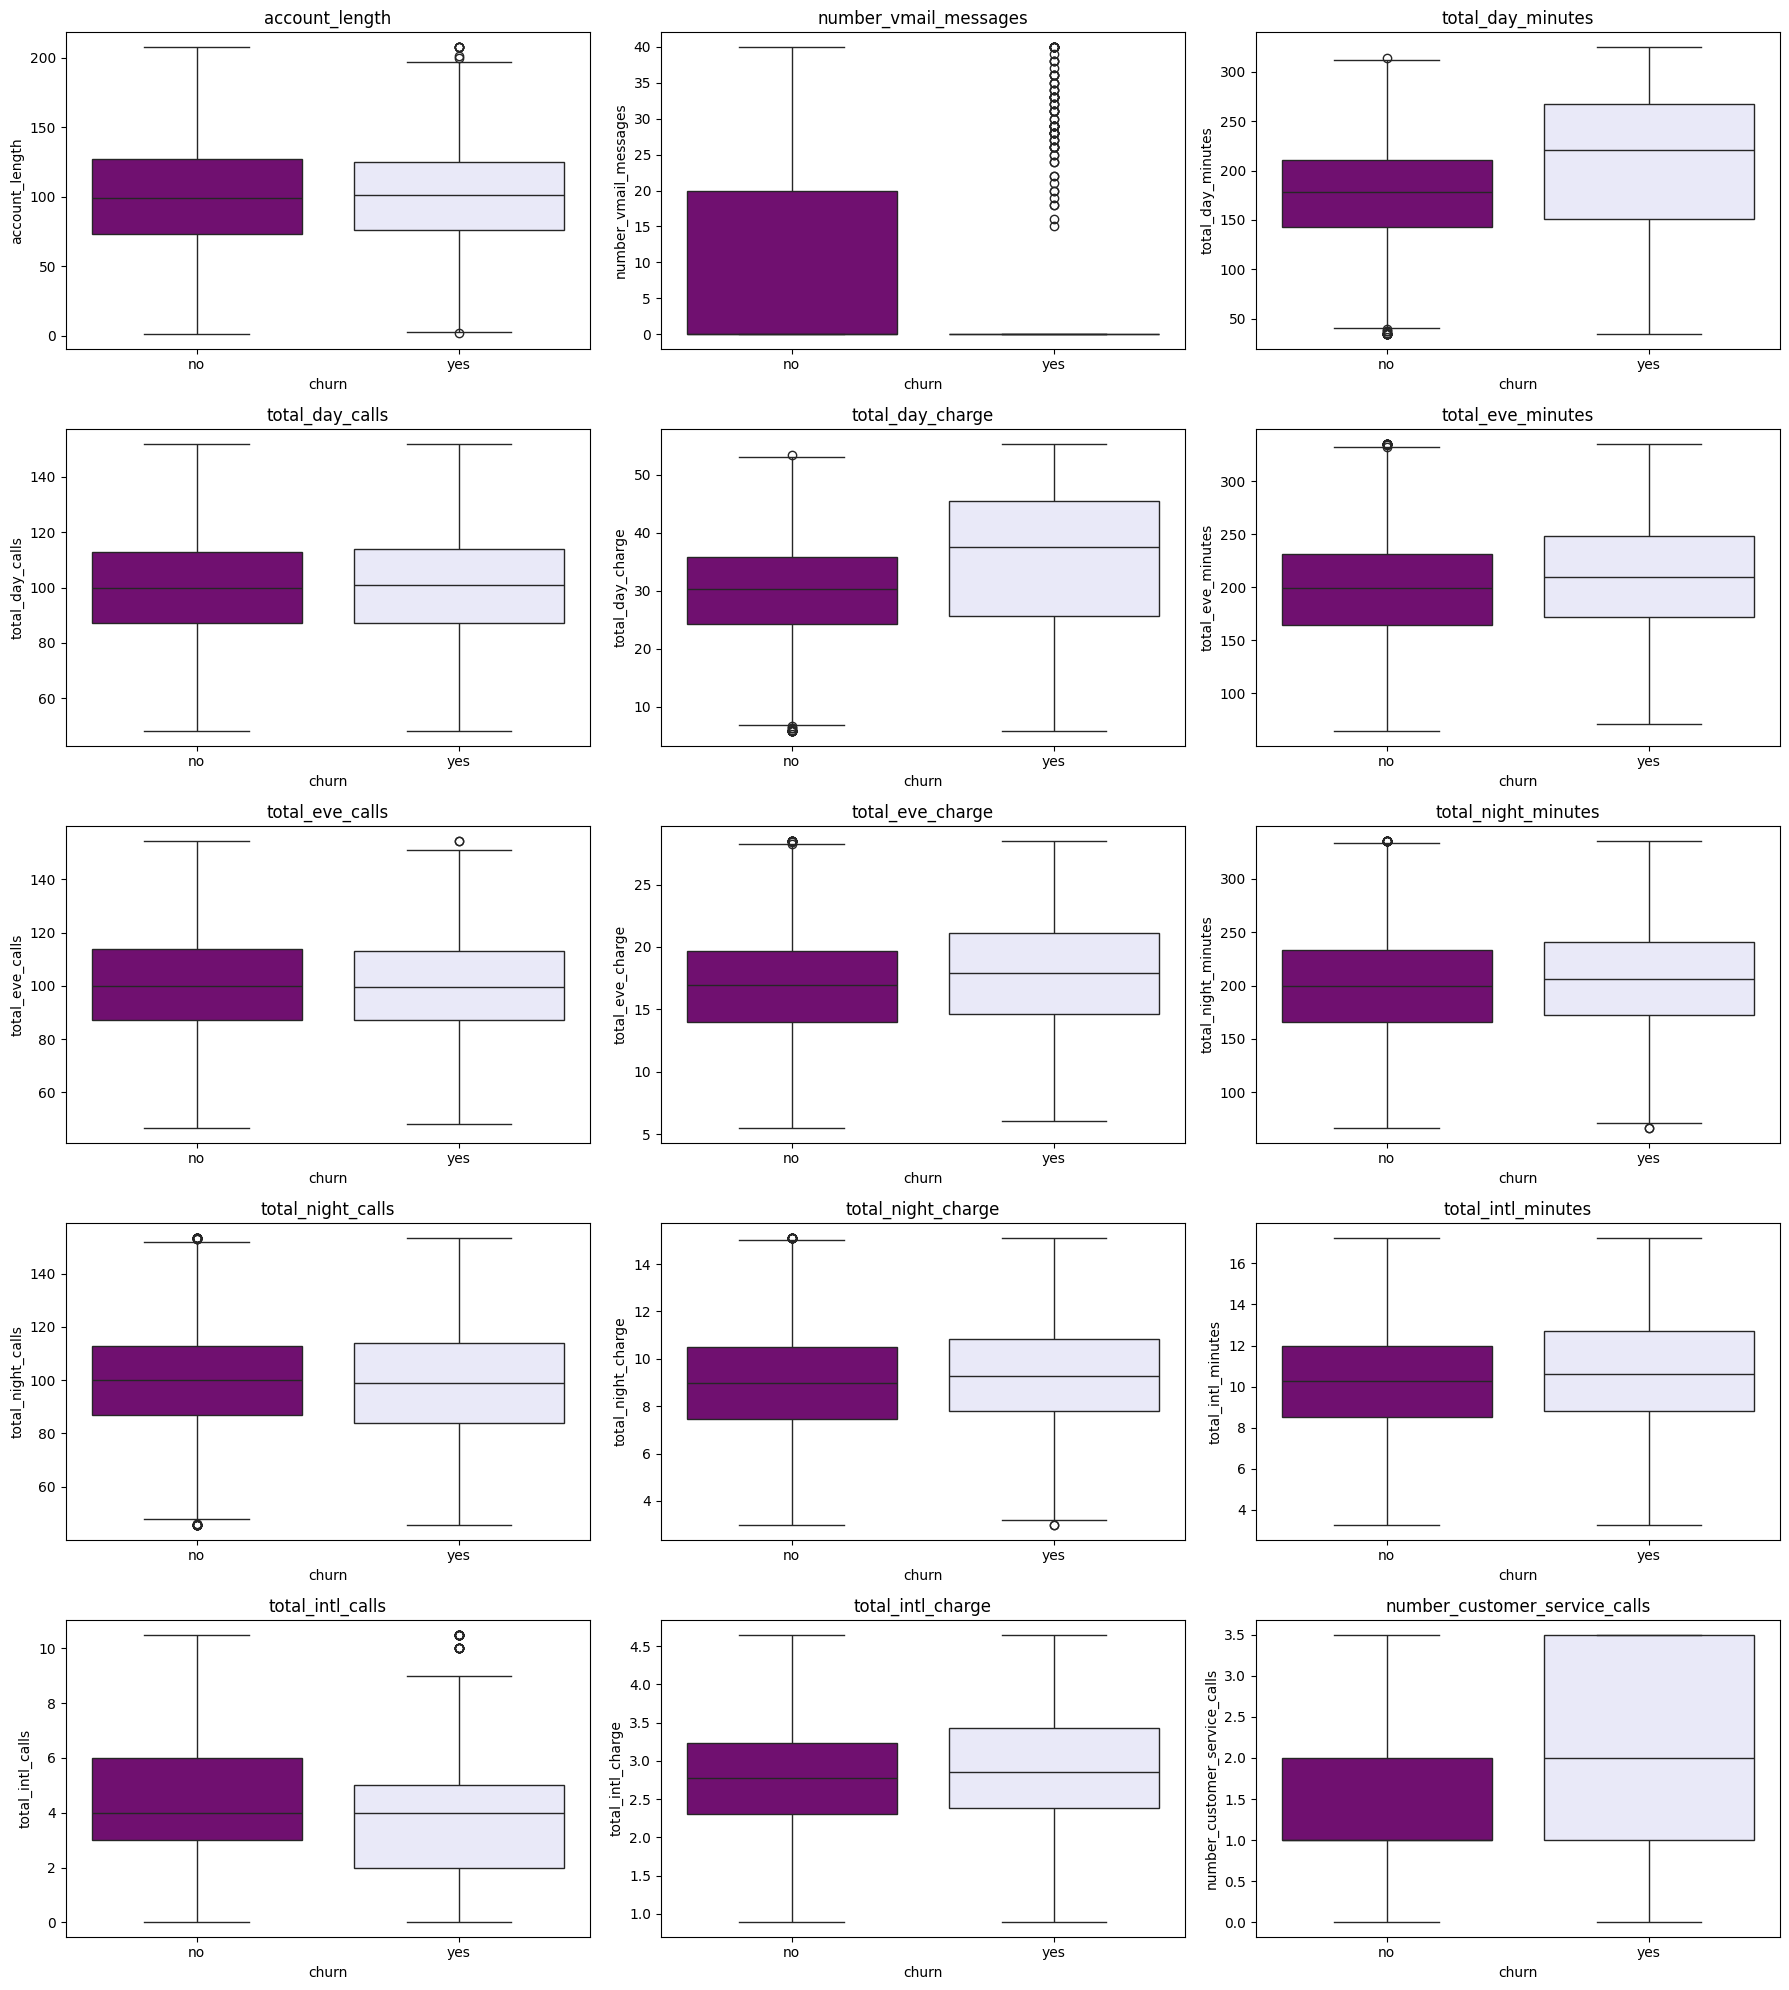

In [28]:
plot_boxplots(df_cleaned, num_cols, 'churn')

*   The number of customer service calls, total day minutes, and total day charge have an impact on churn. The higher their values, the higher the churn rate.
*   The number of voicemail messages does not have any effect on churn whatsoever.

# Label Encoding

In [29]:
df_clean = df_cleaned.copy()

In [30]:
from sklearn.preprocessing import LabelEncoder

def label_encode(df):
    le = LabelEncoder()
    for col in df.columns:
        if df[col].dtype == 'O':  # Check if column is of object type (categorical)
            df[col] = le.fit_transform(df[col])
    return df

In [31]:
df_clean_encoded = label_encode(df_clean)

In [32]:
fig = px.imshow(df_clean.corr().round(2), color_continuous_scale='viridis', text_auto=True)
fig.update_layout(title='correlation heatmap',
                  showlegend=False,
                  height=1000,
                  width=1000)
fig.show()


*   There is a strong correlation between the minutes and charges features, as call costs are correlated with duration.
*   The international plan feature (0.26), total day minutes (0.21), total day charge (0.21), and number of customer service calls (0.17) exhibit significant correlations with churn.
*   Additionally, there is a high correlation between the voice mail plan and the number of voicemail messages.

In [33]:
import plotly.graph_objects as go

df_clean_corr_churn = df_clean.corr()['churn'].sort_values(ascending=False)
fig = go.Figure(data=[go.Bar(x=df_clean_corr_churn.index, y=df_clean_corr_churn.values, marker_color='purple')])
fig.update_layout(title='correlation with churn', xaxis_title='features', yaxis_title='correlation')
fig.show()

*   The international plan, total day minutes, total day charge, and number of customer service calls are positively correlated with churn.
*   Conversely, the voice mail plan shows a negative correlation, indicating that as one variable increases, the other tends to decrease. In this case, a higher frequency of 'no' values for the vmail plan correlates with higher churn rates.

# Feature Engineering

In [34]:
df_prep = df_clean.copy()

In [35]:
def preprocess(df):
    df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
    df['total_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
    df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']
    df.drop(columns=['state', 'area_code', 'account_length', 'total_day_minutes', 'total_eve_minutes',
                     'total_night_minutes', 'total_day_calls', 'total_eve_calls', 'total_night_calls',
                     'total_day_charge', 'total_eve_charge', 'total_night_charge'], inplace=True)
    return df

*   The total calls, total minutes, and total charge features are derived from the reduction of features for daytime to nighttime by summing them up.
*   Removing unnecessary columns.

In [36]:
preprocess(df_prep).head()

,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge
0,0,1,26.0,13.7,3.0,3.70,1.0,0,611.50,329.0,55.540
1,0,0,0.0,12.2,5.0,3.29,0.0,0,527.20,328.0,59.000
2,1,0,0.0,6.6,7.0,1.78,2.0,0,560.45,248.0,65.215
3,1,0,0.0,10.1,3.0,2.73,3.0,0,501.90,356.0,49.360
4,0,1,24.0,7.5,7.0,2.03,3.0,0,766.35,314.0,75.175


# Data Splitting

In [37]:
from sklearn.model_selection import train_test_split

x = df_prep.drop('churn',axis=1).values
y = df_prep.churn.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)

(3400, 10) (850, 10)


# Data Scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

*   Previously, label encoding was performed on categorical columns to convert their values into sequential numeric values (0 and 1).
*   Now, data was split into training and testing sets with an 80:20 ratio.
*   Feature scaling was applied using MinMaxScaler() to normalize the values of numerical features within the range of 0 and 1.

# Data Modelling

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score

In [40]:
def display_classification_report_and_confusion_matrix(x_data, y_data, model, data_type, model_name, y_pred):
    print('\nClassification Report for', data_type, 'Model:')
    print(classification_report(y_data, y_pred))

    confusion_matrix_data = pd.DataFrame(confusion_matrix(y_data, y_pred), index=['Not Churn', 'Churn'], columns=['Not Churn', 'Churn'])

    plt.figure()
    heatmap = sns.heatmap(confusion_matrix_data, annot=True, annot_kws={'size': 14}, fmt='d', cmap='twilight')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

    plt.title('Confusion Matrix for ' + data_type + ' ' + model_name + ' Model', fontsize=18, color='black')
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    plt.show()

In [41]:
# Define model evaluation lists
model_list = []
accuracy_list = []
precision_list = []
f1_score_list = []
roc_auc_list = []

# Define train_model function
def train_model(algorithm, model_name, x_train, y_train, x_test, y_test):
    model = algorithm().fit(x_train, y_train)

    # Predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate evaluation metrics
    accuracy = round(accuracy_score(y_test, y_test_pred), 3)
    precision = round(precision_score(y_test, y_test_pred), 3)
    f1 = round(f1_score(y_test, y_test_pred), 3)
    roc_auc = round(roc_auc_score(y_test, y_test_pred), 3)

    # Print evaluation metrics
    print(f'Test Accuracy Score is: {accuracy}')
    print(f'Test Precision Score is: {precision}')
    print(f'f1 Score is: {f1}')
    print(f'ROC AUC Score is: {roc_auc}')

    # Append evaluation metrics to lists
    model_list.append(model_name)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    f1_score_list.append(f1)
    roc_auc_list.append(roc_auc)

    return model

Test Accuracy Score is: 0.872
Test Precision Score is: 0.763
f1 Score is: 0.347
ROC AUC Score is: 0.606

Training Performance for Logistic Regression Model:

Classification Report for Training Model:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2931
           1       0.62      0.15      0.24       469

    accuracy                           0.87      3400
   macro avg       0.75      0.57      0.59      3400
weighted avg       0.84      0.87      0.83      3400



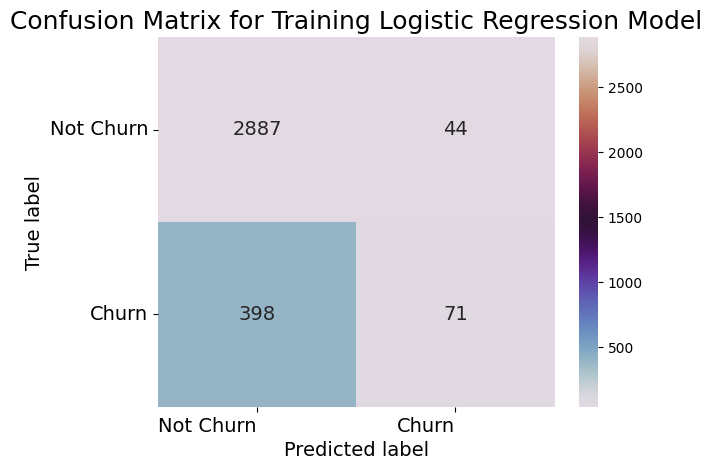


Testing Performance for Logistic Regression Model:

Classification Report for Testing Model:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       721
           1       0.76      0.22      0.35       129

    accuracy                           0.87       850
   macro avg       0.82      0.61      0.64       850
weighted avg       0.86      0.87      0.84       850



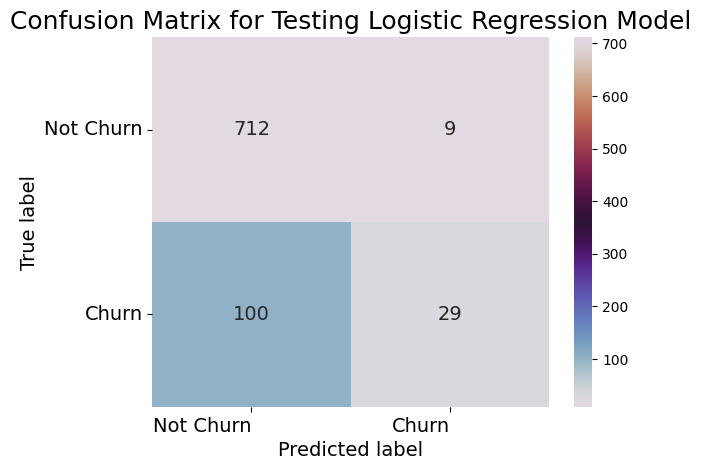

Test Accuracy Score is: 0.915
Test Precision Score is: 0.89
f1 Score is: 0.644
ROC AUC Score is: 0.746

Training Performance for K-Nearest Neighbor Model:

Classification Report for Training Model:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2931
           1       0.93      0.60      0.73       469

    accuracy                           0.94      3400
   macro avg       0.93      0.80      0.85      3400
weighted avg       0.94      0.94      0.93      3400



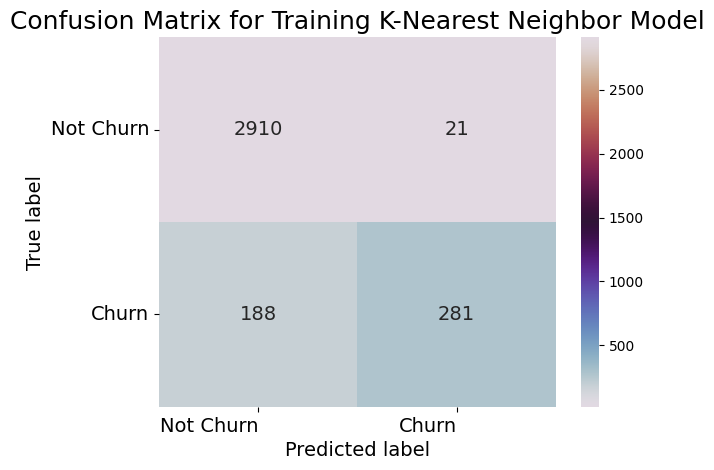


Testing Performance for K-Nearest Neighbor Model:

Classification Report for Testing Model:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       721
           1       0.89      0.50      0.64       129

    accuracy                           0.92       850
   macro avg       0.90      0.75      0.80       850
weighted avg       0.91      0.92      0.91       850



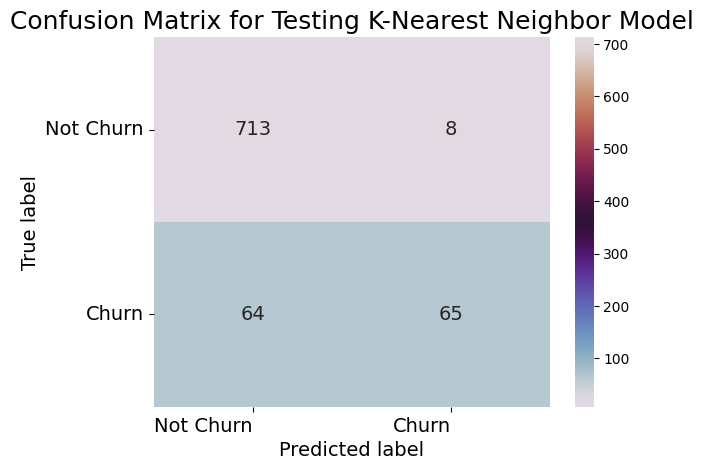

Test Accuracy Score is: 0.949
Test Precision Score is: 0.826
f1 Score is: 0.835
ROC AUC Score is: 0.907

Training Performance for Decision Tree Model:

Classification Report for Training Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2931
           1       1.00      1.00      1.00       469

    accuracy                           1.00      3400
   macro avg       1.00      1.00      1.00      3400
weighted avg       1.00      1.00      1.00      3400



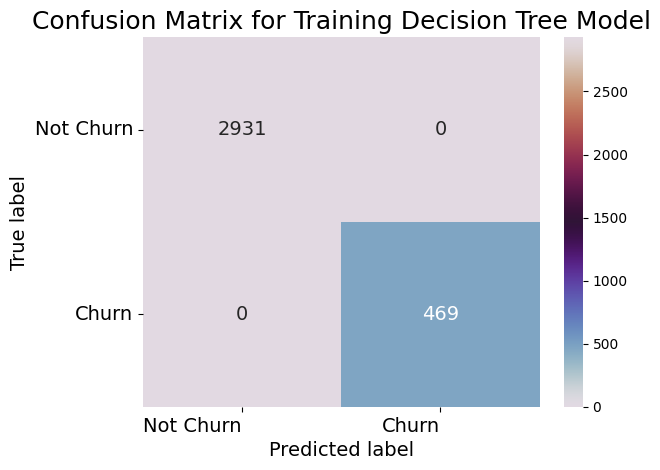


Testing Performance for Decision Tree Model:

Classification Report for Testing Model:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       721
           1       0.83      0.84      0.84       129

    accuracy                           0.95       850
   macro avg       0.90      0.91      0.90       850
weighted avg       0.95      0.95      0.95       850



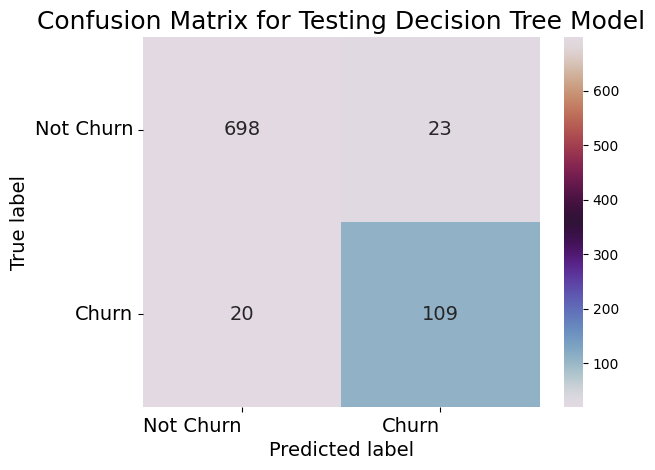

Test Accuracy Score is: 0.976
Test Precision Score is: 0.974
f1 Score is: 0.918
ROC AUC Score is: 0.932

Training Performance for Random Forest Model:

Classification Report for Training Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2931
           1       1.00      1.00      1.00       469

    accuracy                           1.00      3400
   macro avg       1.00      1.00      1.00      3400
weighted avg       1.00      1.00      1.00      3400



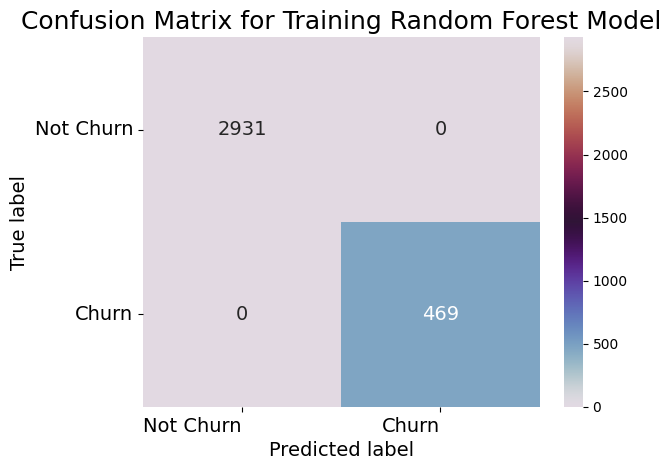


Testing Performance for Random Forest Model:

Classification Report for Testing Model:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       721
           1       0.97      0.87      0.92       129

    accuracy                           0.98       850
   macro avg       0.98      0.93      0.95       850
weighted avg       0.98      0.98      0.98       850



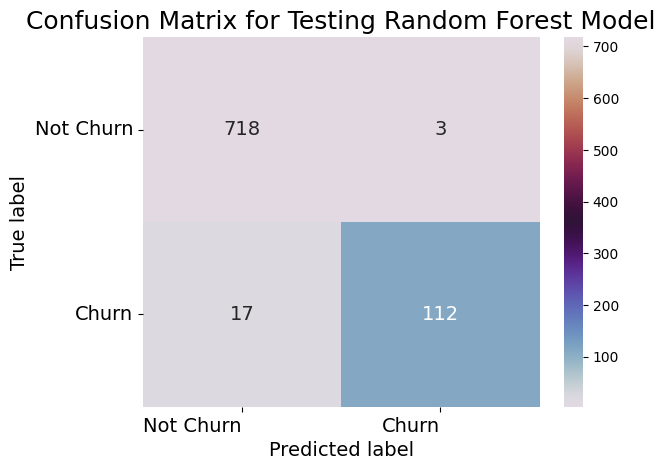

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Test Accuracy Score is: 0.929
Test Precision Score is: 0.879
f1 Score is: 0.727
ROC AUC Score is: 0.802

Training Performance for Neural Network Model:

Classification Report for Training Model:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2931
           1       0.91      0.62      0.74       469

    accuracy                           0.94      3400
   macro avg       0.93      0.80      0.85      3400
weighted avg       0.94      0.94      0.93      3400



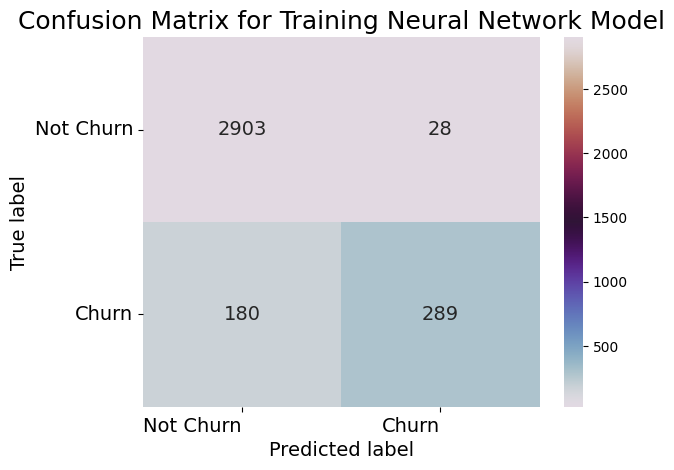


Testing Performance for Neural Network Model:

Classification Report for Testing Model:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       721
           1       0.88      0.62      0.73       129

    accuracy                           0.93       850
   macro avg       0.91      0.80      0.84       850
weighted avg       0.93      0.93      0.92       850



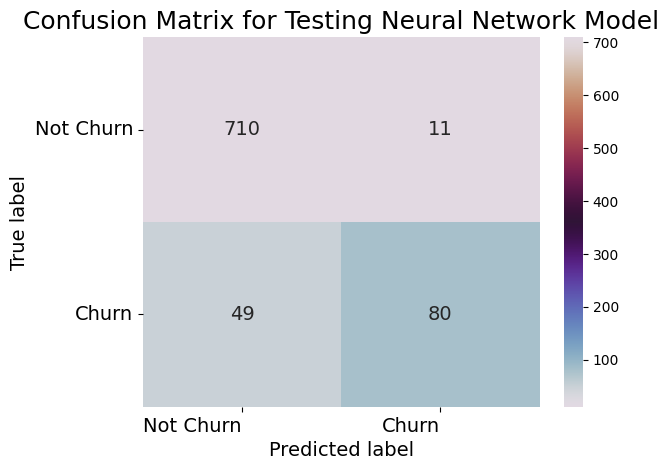

Test Accuracy Score is: 0.974
Test Precision Score is: 0.957
f1 Score is: 0.911
ROC AUC Score is: 0.931

Training Performance for Gradient Boosting Model:

Classification Report for Training Model:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2931
           1       1.00      0.87      0.93       469

    accuracy                           0.98      3400
   macro avg       0.99      0.93      0.96      3400
weighted avg       0.98      0.98      0.98      3400



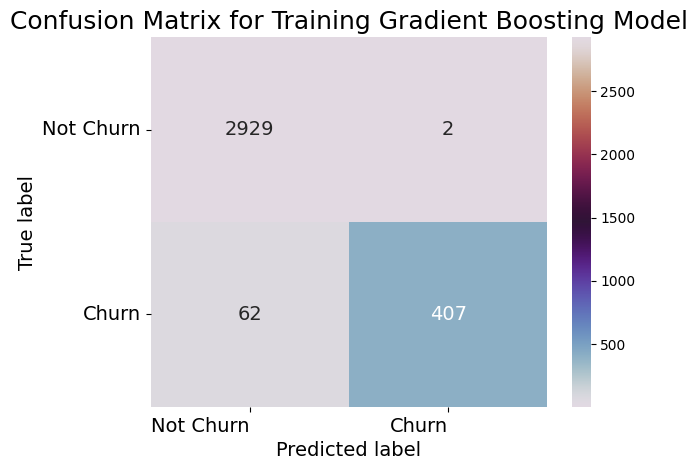


Testing Performance for Gradient Boosting Model:

Classification Report for Testing Model:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       721
           1       0.96      0.87      0.91       129

    accuracy                           0.97       850
   macro avg       0.97      0.93      0.95       850
weighted avg       0.97      0.97      0.97       850



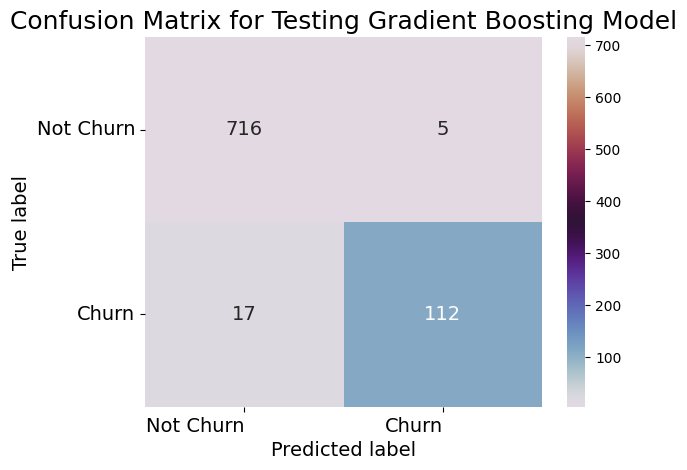


Model Evaluation Metrics:


,Model,Accuracy,Precision,F1 Score,ROC AUC Score
0,Logistic Regression,0.872,0.763,0.347,0.606
1,K-Nearest Neighbor,0.915,0.890,0.644,0.746
2,Decision Tree,0.949,0.826,0.835,0.907
3,Random Forest,0.976,0.974,0.918,0.932
4,Neural Network,0.929,0.879,0.727,0.802
5,Gradient Boosting,0.974,0.957,0.911,0.931


In [42]:
# Train and evaluate models
model_objects = {
    'Logistic Regression': LogisticRegression,
    'K-Nearest Neighbor': KNeighborsClassifier,
    'Decision Tree': DecisionTreeClassifier,
    'Random Forest': RandomForestClassifier,
    'Neural Network': MLPClassifier,
    'Gradient Boosting': GradientBoostingClassifier
}

for model_name, algorithm in model_objects.items():
    model = train_model(algorithm, model_name, x_train, y_train, x_test, y_test)
    print(f"\nTraining Performance for {model_name} Model:")
    y_train_pred = model.predict(x_train)
    display_classification_report_and_confusion_matrix(x_train, y_train, model, 'Training', model_name, y_train_pred)
    print(f"\nTesting Performance for {model_name} Model:")
    y_test_pred = model.predict(x_test)
    display_classification_report_and_confusion_matrix(x_test, y_test, model, 'Testing', model_name, y_test_pred)

# Display model evaluation metrics
evaluation_metrics = pd.DataFrame({
    'Model': model_list,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'F1 Score': f1_score_list,
    'ROC AUC Score': roc_auc_list
})
print("\nModel Evaluation Metrics:")
evaluation_metrics

# Prediction

In [44]:
from google.colab import files
uploaded = files.upload()

Saving Data Test.csv to Data Test.csv


In [45]:
df_test = pd.read_csv(io.BytesIO(uploaded['Data Test.csv']))
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [46]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [47]:
df_test_copy = df_test.copy()


In [48]:
df_test_encode = label_encode(df_test_copy)

In [49]:
df_test_prep = preprocess(df_test_encode)
df_test_prep.head()

,id,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_minutes,total_calls,total_charge
0,1,0,1,25,10.0,3,2.70,1,707.2,300,72.86
1,2,1,0,0,6.3,6,1.70,0,647.9,317,65.91
2,3,0,0,0,13.1,6,3.54,4,630.9,245,55.77
3,4,0,0,0,8.1,3,2.19,3,538.5,346,56.80
4,5,0,0,0,15.5,5,4.19,3,652.1,303,55.96


In [50]:
df_pred = df_test_prep.drop('id', axis=1)
df_pred.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_minutes,total_calls,total_charge
0,0,1,25,10.0,3,2.70,1,707.2,300,72.86
1,1,0,0,6.3,6,1.70,0,647.9,317,65.91
2,0,0,0,13.1,6,3.54,4,630.9,245,55.77
3,0,0,0,8.1,3,2.19,3,538.5,346,56.80
4,0,0,0,15.5,5,4.19,3,652.1,303,55.96


In [51]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   international_plan             750 non-null    int64  
 1   voice_mail_plan                750 non-null    int64  
 2   number_vmail_messages          750 non-null    int64  
 3   total_intl_minutes             750 non-null    float64
 4   total_intl_calls               750 non-null    int64  
 5   total_intl_charge              750 non-null    float64
 6   number_customer_service_calls  750 non-null    int64  
 7   total_minutes                  750 non-null    float64
 8   total_calls                    750 non-null    int64  
 9   total_charge                   750 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 58.7 KB


In [52]:
def predict(model_name, df_pred, model_objects, x_train=None, y_train=None):
    if model_name not in model_objects:
        print(f"Error: Model {model_name} not found.")
        return None

    model = model_objects[model_name]()

    if x_train is not None and y_train is not None:
        model.fit(x_train, y_train)
    elif model_name == 'MLPClassifier':
        print("Error: Missing training data for training the MLP model.")
        return None

    predict = model.predict(df_pred)
    predicted_labels = ['yes' if pred == 1 else 'no' for pred in predict]
    results_subset = pd.DataFrame(predicted_labels, columns=['churn'])
    print('Model used:', model)
    return results_subset.head()

In [53]:
#predict('Logistic Regression', df_pred, model_objects, x_train, y_train)
predict('K-Nearest Neighbor', df_pred, model_objects, x_train, y_train)
#predict('Decision Tree', df_pred, model_objects, x_train, y_train)
#predict('Random Forest', df_pred, model_objects, x_train, y_train)
#predict('Neural Network', df_pred, model_objects, x_train, y_train)
#predict('Gradient Boosting', df_pred, model_objects, x_train, y_train)

Model used: KNeighborsClassifier()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



,churn
0,yes
1,yes
2,yes
3,yes
4,yes
